# Assigment 1

This is the link to Github: https://github.com/aruyralopez/EC_Assigment1

In [1]:
# Import packages

import statsmodels.api as sm
import statsmodels.formula.api as smf
#import statsmodels.stats.weightstats as smw
import numpy as np
import random
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Kaggle

This is a description of the data downloaded from kaggle

The dataset is downloaded from kaggle (https://www.kaggle.com/datasets/uciml/adult-census-income) and is called "Adult Census Income".

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year

In [3]:
## Read the CSV and define it as df

df = pd.read_csv('adult.csv')

## Data Cleaning & Manipulation

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
len(df)

32561

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

With a brief look at the data we see that it has 15 columns, 6 int64 & 9 object, its lenght i of 32561, so our sample would be of that amount of people.

First lets fix the names of the columns as normally python doesn get along with dot names.

In [7]:
# Replace "." by "_"
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

Before we saw some cells containing values as "?" it would be a good assumption to think that its missing data, so lets see if there is other values missing and lets replace the "?" for "missing". Then we will decide if its better to keep them or drop them in with a non quantitative assumption.

In [8]:
# Search for missing values inside the different columns

print('workclas', df.workclass.unique())
print('education', df['education'].unique())
print('marital_status', df.marital_status.unique())
print('occupation', df.occupation.unique())
print('relationship', df.relationship.unique())
print('race', df.race.unique())
print('sex', df.sex.unique())
print('native_country', df.native_country.unique())
print('income', df.income.unique())

workclas ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex ['Female' 'Male']
native_country ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'C

In [9]:
# Replace "?" by "missing" & create df1
df1 = df.replace('?', 'missing')
# Drop "?" & create df2
df2 = df[~df.isin(['?']).any(axis=1)].reset_index(drop=True)

In [10]:
print("lenght keep",len(df1))
print("lenght drop",len(df2))

lenght keep 32561
lenght drop 30162


The assumption its that because the data base its only reduce by a 7% we will drop the missing value as its of no use for us and can lead to bad assumptions where data ist related with the value missing, when there its not a real relation.

## Data Description & Visualization

In [11]:
df2.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

First we will analyze the qualitative data (categorical or object) then the quantitative (int64) and finally we will focus in the categorical variable "income" comparing it with others, as is in some sense the one we are more interested to relate with others.

### Qualitative Data

In [12]:
df2['workclass'].value_counts(normalize = True)

workclass
Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: proportion, dtype: float64

From outr sample most people work on the private sector with a 73% and its followed by 8% in self employed with no income and 6% local goverment.

In [13]:
df2['education'].value_counts(normalize = True)

education
HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: proportion, dtype: float64

The sample has a variaty of education 32% HS-grad, 22% some-college and 16% bachelors

In [14]:
df2['marital_status'].value_counts(normalize = True)

marital_status
Married-civ-spouse       0.466315
Never-married            0.322459
Divorced                 0.139712
Separated                0.031132
Widowed                  0.027419
Married-spouse-absent    0.012267
Married-AF-spouse        0.000696
Name: proportion, dtype: float64

People in 46% are married-civ-dispouse, 32% never-married and 14% divorced.

In [15]:
df2['occupation'].value_counts(normalize = True)

occupation
Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: proportion, dtype: float64

There is a big variaty of occupations, with 13% Prof-specialty, 13% Craft-repair, 13% Exec-managerial, 12% Adm-clerical, 12% Sales and 11% Other-service.

In [16]:
df2['relationship'].value_counts(normalize = True)

relationship
Husband           0.413202
Not-in-family     0.256150
Own-child         0.148067
Unmarried         0.106492
Wife              0.046615
Other-relative    0.029474
Name: proportion, dtype: float64

In [17]:
df2['race'].value_counts(normalize = True)

race
White                 0.859790
Black                 0.093396
Asian-Pac-Islander    0.029673
Amer-Indian-Eskimo    0.009482
Other                 0.007659
Name: proportion, dtype: float64

In [18]:
df2['sex'].value_counts(normalize = True)

sex
Male      0.675685
Female    0.324315
Name: proportion, dtype: float64

Our data set contains most males than females, with a distribution of 67% versus 32%.

In [19]:
df2['native_country'].value_counts(normalize = True)

native_country
United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
El-Salvador                   0.003315
India                         0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
Italy                         0.002254
China                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Poland                        0.001857
Columbia                      0.001857
Taiwan                        0.001392
Haiti                         0.001392
Iran                          0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru      

In [20]:
df2['income'].value_counts(normalize = True)

income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64

When getting into our most relevant variable we see that most people are in <=50K with a 75% and 25% for >50k

We are going to visualize the same data that we just commented in order to have a more visual understanding of how our sample is distributed/categorize

In [21]:
# Select only categorical values
df2objects = df2.select_dtypes(include='object')
# We drop native_country as it has many unique values, and before we saw that mostly are United-States (91%)
df2objects.drop(columns=['native_country'], inplace=True)

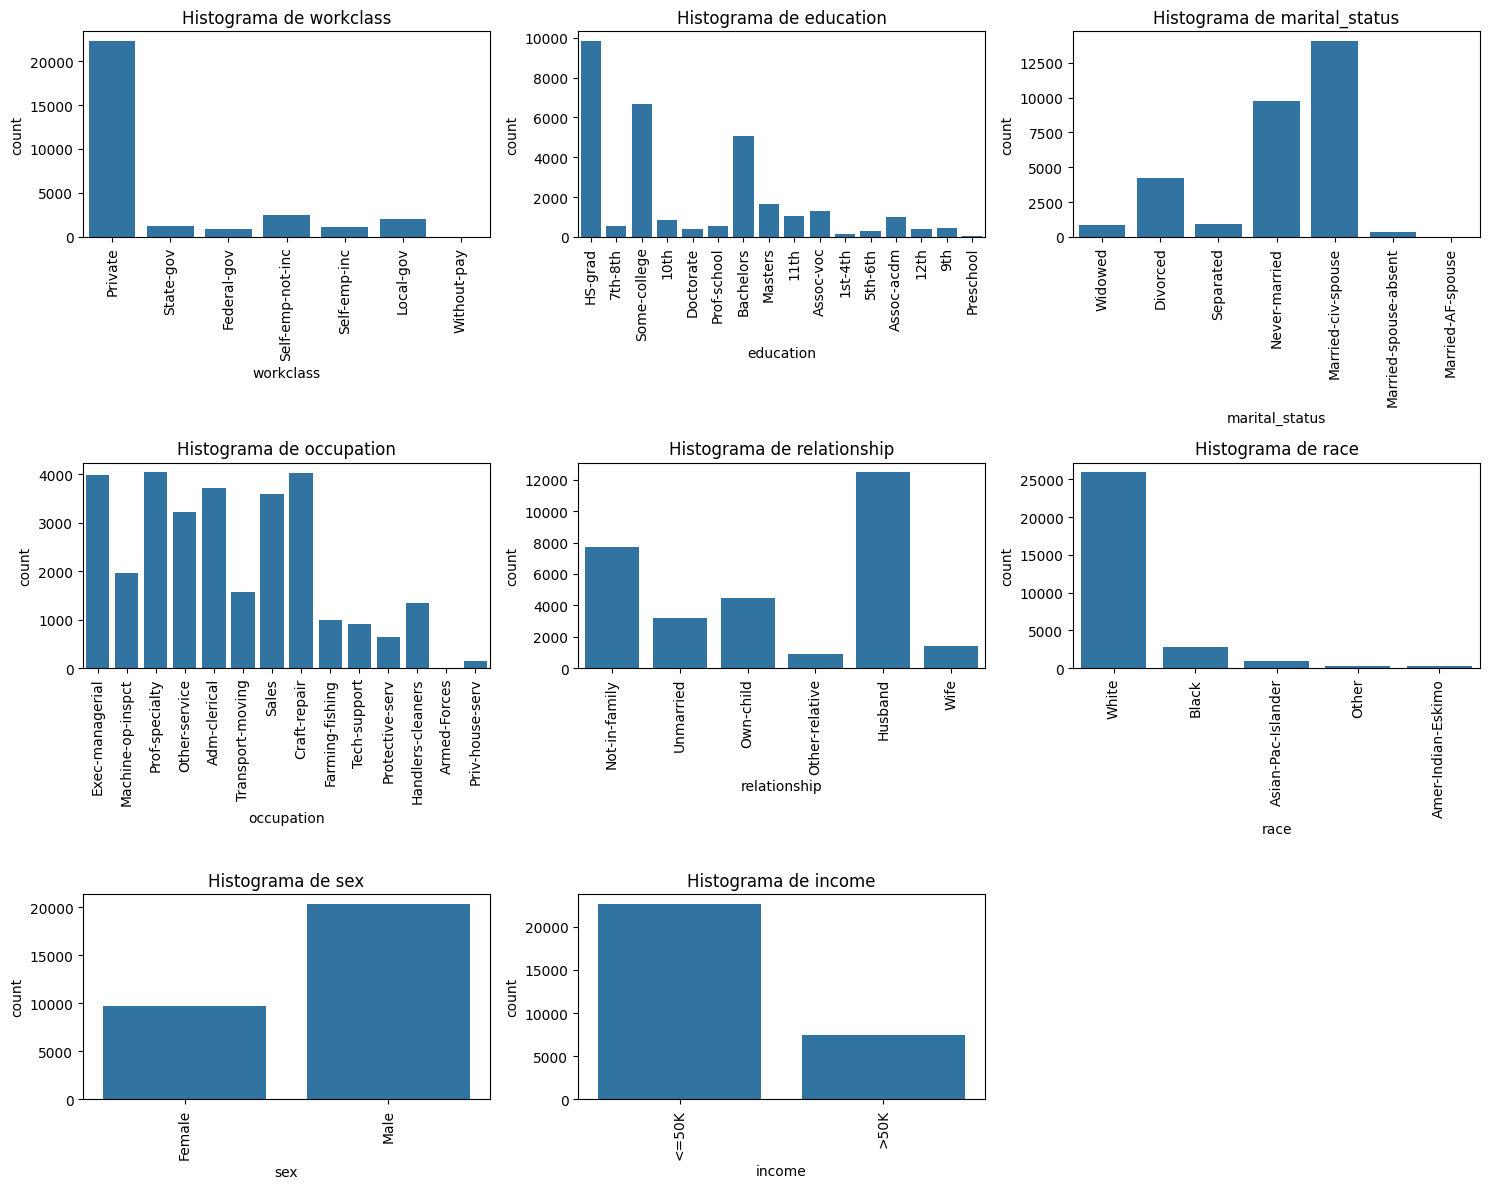

In [22]:
num_columns = df2objects.shape[1]
num_rows = 3
num_c_r = (num_columns + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_c_r, figsize=(5 * num_c_r, 4 * num_rows))

axes = axes.flatten()

for i, column in enumerate(df2objects.columns):
    sns.countplot(data=df2objects, x=column, ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].tick_params(axis='x', rotation=90)  # We rotate the tags 90 grades so we can read them

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Quantitative Data

In [23]:
df2.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We see that the mean age for the sameple is 38 years old, min sample is 17 and the max 90, the mean education_num for the sameple is 10 , min sample is 0 and the max 16 and the mean hours_per_week for the sameple is 41, min sample is 1 and the max 99.

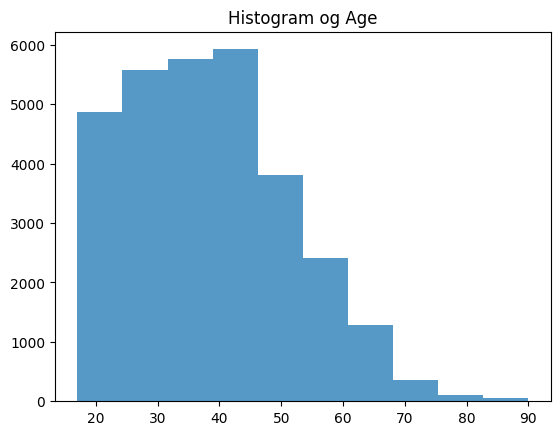

In [24]:
plt.hist(df2['age'], alpha=0.75)
plt.title('Histogram og Age')
plt.show()

The distribution of age is mostly between 17 & 50 with a visual median of maybe 44.

<Axes: xlabel='age', ylabel='hours_per_week'>

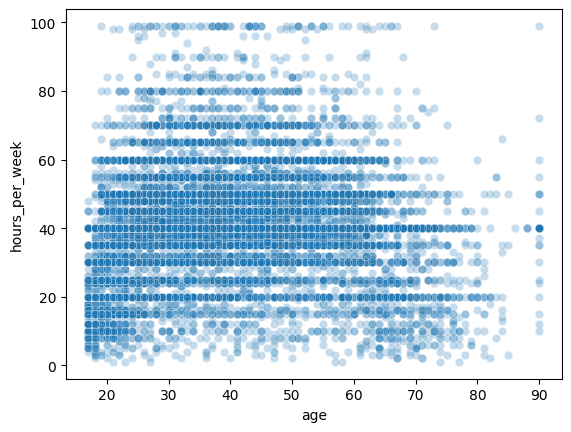

In [25]:
sns.scatterplot(data=df2 , x='age', y='hours_per_week', alpha=0.25)

On the scatter plot we can se that there might be a tendency of working 40 hours but its more like a curved line, where you work less on the extremes and 40 hours on the center, meaning that whe you start working you do less hours, on your mature life more and when you get really old you start working less and less.

### Income 

We are going to put our attention in how the categorical variable "income" is related with other ones

<Axes: xlabel='age', ylabel='hours_per_week'>

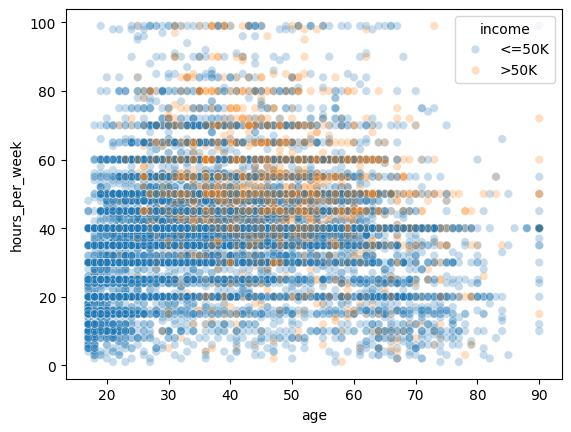

In [26]:
sns.scatterplot(data=df2 , x='age', y='hours_per_week', hue='income', alpha=0.25)

On the sacatter plot above we can deduce that to earn more than >50K normally you need to work more hours or be older than 30, if you combine both your probabilities increase.

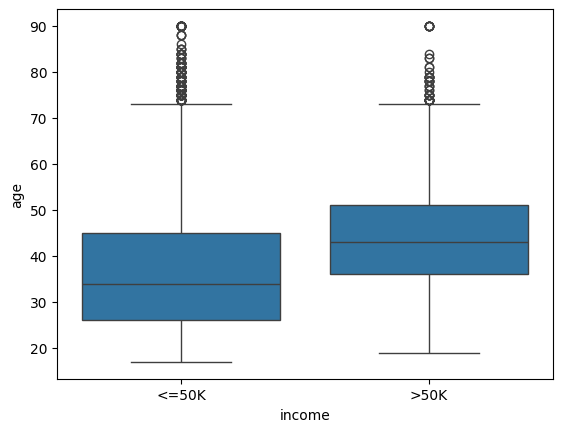

In [27]:
sns.boxplot(data=df2, x='income', y='age')
plt.show()

Focusing on the relation between income and age we can see that people who earn >50K are usually older thant those of <=50K

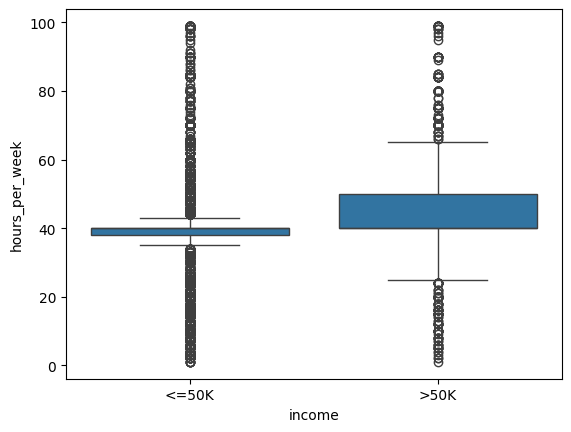

In [28]:
sns.boxplot(data=df2, x='income', y='hours_per_week')
plt.show()

With ours per week something similar happen, the mean is higher for >50K, but in <=50K there is a tendency to work mostly around 38 hours

<Axes: xlabel='income', ylabel='count'>

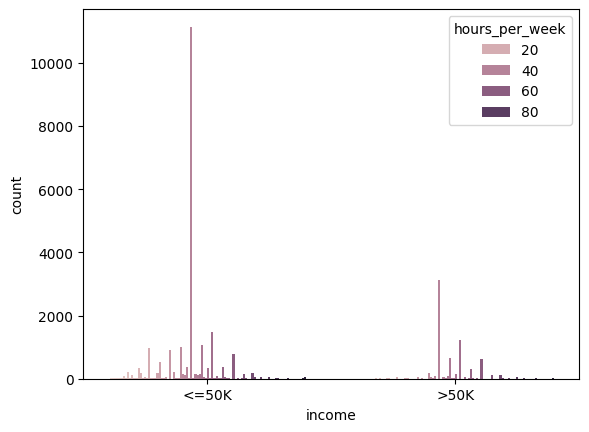

In [29]:
sns.countplot(x='income', hue='hours_per_week', data=df2)

With the plot above we can see that dispersion of hours worked in >50K is kind of distributed, and for <=50K its mostly accumulated on the mean.

In [30]:
df2.groupby('income')['sex'].value_counts().unstack()  

sex,Female,Male
income,,
<=50K,8670,13984
>50K,1112,6396


In [31]:
df2.groupby('income')['sex'].value_counts(normalize = True).unstack()  

sex,Female,Male
income,,
<=50K,0.382714,0.617286
>50K,0.148109,0.851891


Grouping income by sex, we can see that the distribution we saw before its not the same depending on incomes as there is a 14% of the hig income are females and 85% males

In [32]:
df2.groupby('income')['occupation'].value_counts().unstack()  

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,
<=50K,3223,8,3122,2055,874,1267,1721,3080,142,2227,434,2614,634,1253
>50K,498,1,908,1937,115,83,245,132,1,1811,210,970,278,319


The distribution between occupations tells us that the best occupation to earn high income would be Exec-managerial or Prof-specialty and we see that its almost half-half of the total comparing with low income.

The next code is to convert the object variable 'income' into a number (factorize) that will be usefull later for creating a logistic regression. but that is for the next assigment

In [33]:
df2['f_income'] = pd.factorize(df2['income'])[0]